In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns

from pangeapy.cell import CellAnnotator
from pangeapy.meta import MetaAnnotator

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (3,3)

In [3]:
cell_anno = CellAnnotator()
meta_anno = MetaAnnotator()

Checking-up download status of anno_models
Checking-up download status of meta_models


# 1) Endocrine cells (missing cell type from atlas)
#### pancreatic islet data imported from Craig-Schapiro et al., 2025, Nat. Commun. (https://www.nature.com/articles/s41467-024-55415-3)

In [ ]:
adata = sc.read('Craig-Schapiro_2025_Pancreas/adata_postprocessing_islet_bbknn.h5ad',
               cache = True)

In [5]:
pred = cell_anno.annotate(adata, compute_uncertainty=True)

conducting Level1 annotation...
conducting Level2 annotation...
computing uncertainty scores...


In [6]:
pred = pred.drop('Sample', axis = 1)

In [7]:
adata.obs = adata.obs.join(pred)

... storing 'Level2|predicted_labels' as categorical
... storing 'Level2|over_clustering' as categorical
... storing 'Level2|majority_voting' as categorical
... storing 'PG_annotations' as categorical


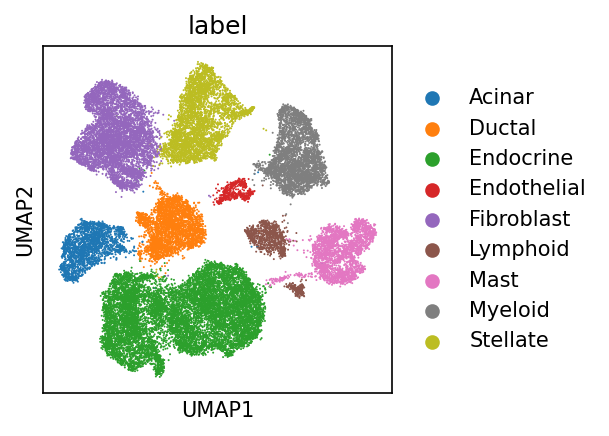

In [8]:
## original labels from the authors
sc.pl.umap(adata, color = 'label')

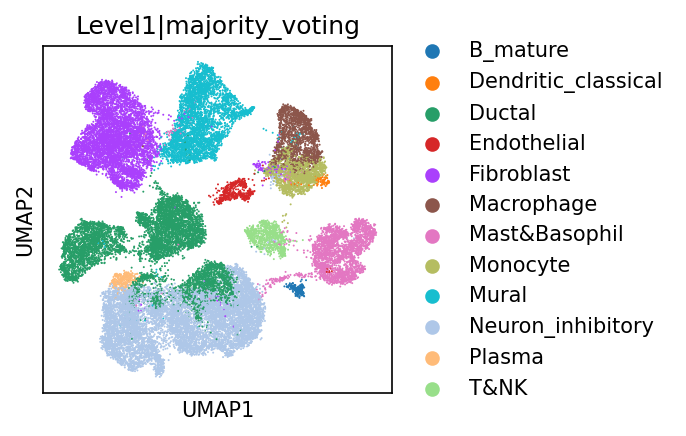

In [9]:
## PANGEA annotation
sc.pl.umap(adata, color = 'Level1|majority_voting')

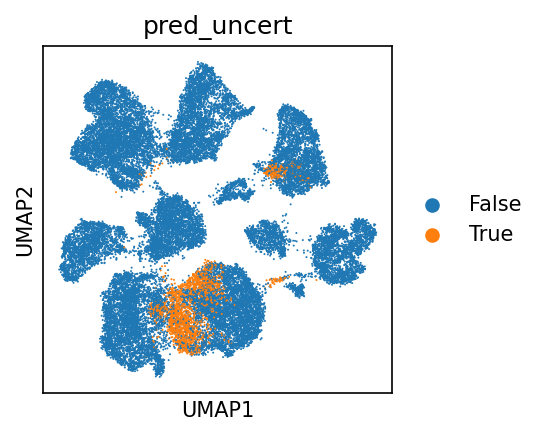

In [10]:
sc.pl.umap(adata, color = 'pred_uncert')

In [11]:
order = adata.obs.groupby("label")['score_uncert'].mean().sort_values().index

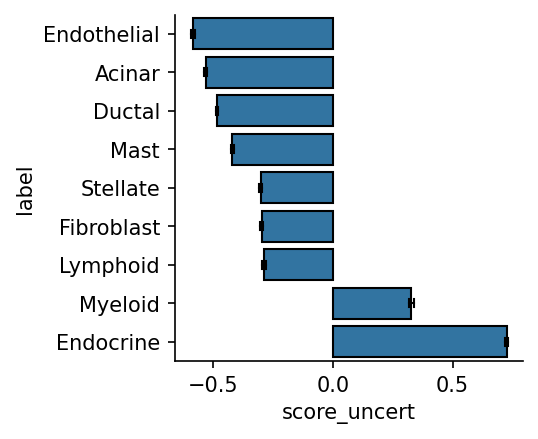

In [12]:
sns.barplot(data = adata.obs, y = 'label', x = 'score_uncert', order = order, errorbar='se', capsize=.2,
           errwidth=1, errcolor='black', linewidth = 1, edgecolor = 'black')
sns.despine()

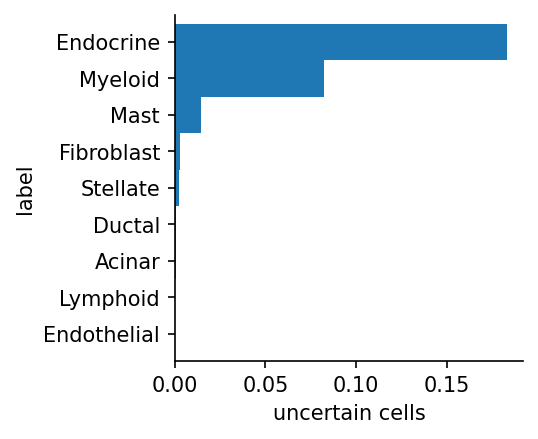

In [13]:
conf_mtx = pd.crosstab(adata.obs['label'], adata.obs['pred_uncert'], normalize=0)
conf_mtx[True].sort_values().plot.barh(width = 1)

plt.xlabel('uncertain cells')
sns.despine()

# 2) Peripheral blood cells (no missing cell types)
#### data imported from Zu et al., 2020, Immunity (https://www.sciencedirect.com/science/article/pii/S1074761320303162?via%3Dihub)

In [ ]:
adata = sc.read("Zhu_2020_CovidBlood/Final_nCov.h5ad")

In [19]:
pred = cell_anno.annotate(adata, compute_uncertainty=True)

conducting Level1 annotation...


/home/srkim/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


conducting Level2 annotation...
computing uncertainty scores...
⚠️ Graph 'distances' not found; computing neighbors...


In [21]:
adata.obs = adata.obs.join(pred)

... storing 'Level2|predicted_labels' as categorical
... storing 'Level2|over_clustering' as categorical
... storing 'Level2|majority_voting' as categorical
... storing 'PG_annotations' as categorical


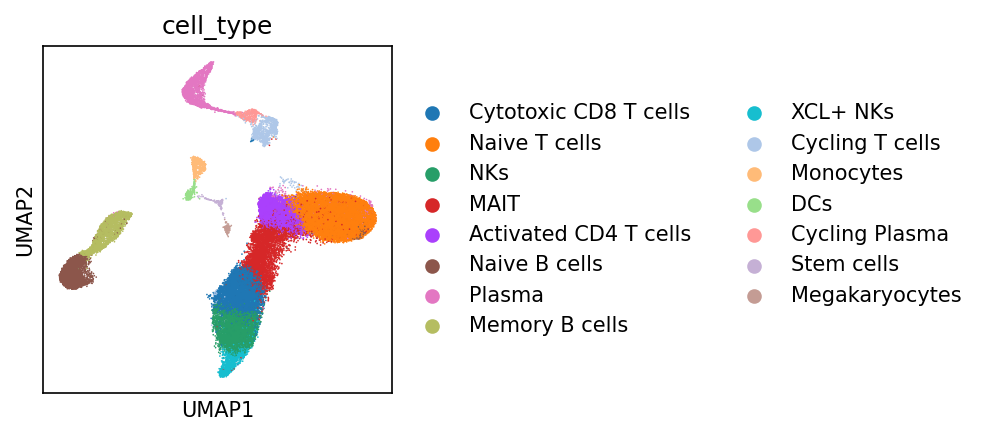

In [22]:
## original labels from the authors
sc.pl.umap(adata, color = 'cell_type')

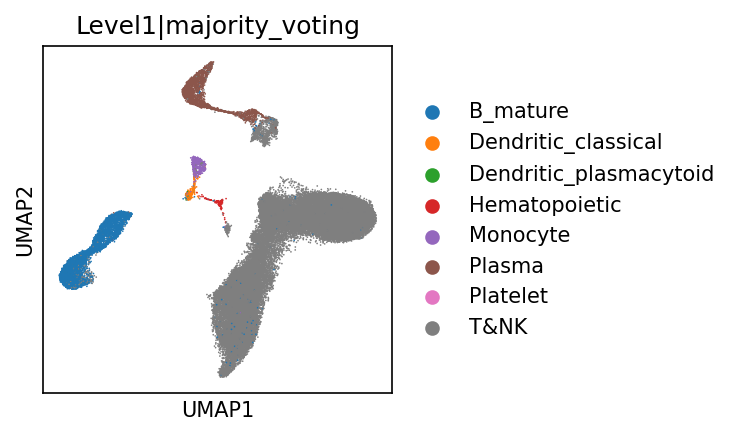

In [23]:
## PANGEA cell type annotation
sc.pl.umap(adata, color = 'Level1|majority_voting')

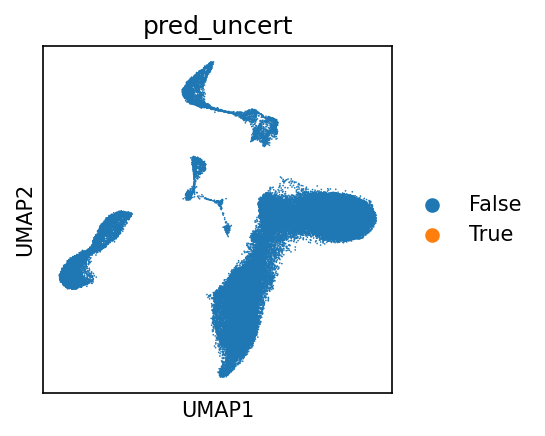

In [24]:
sc.pl.umap(adata, color = 'pred_uncert')

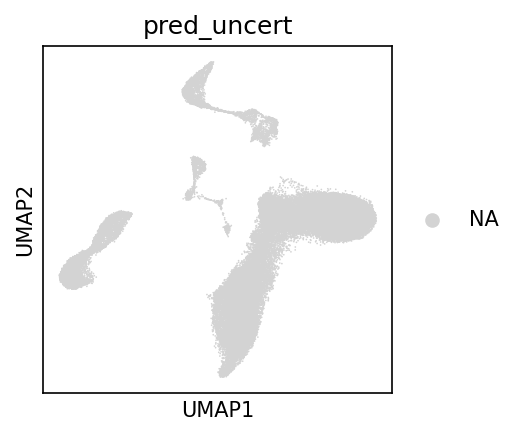

In [25]:
sc.pl.umap(adata, color = 'pred_uncert', groups = 'True')

In [26]:
adata.obs.value_counts('pred_uncert')

pred_uncert
False    46022
True         0
Name: count, dtype: int64